In [1]:
import numpy as np
import pandas as pd

In [2]:
q1 = pd.read_csv('q1.txt', sep="\t")
q1

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA
0,402467,2019-01-01,FX0,210.00
1,403001,2019-01-01,FX1,1097.18
2,403499,2019-01-01,FX0,1209.88
3,403670,2019-01-01,FX0,667.40
4,404183,2019-01-01,FX1,1239.52
...,...,...,...,...
2728244,1624841,2019-08-08,FX1,1467.05
2728245,1624848,2019-08-08,FX0,1189.15
2728246,1624871,2019-08-08,FX1,427.72
2728247,1624878,2019-08-08,FX0,281.14


In [3]:
q1.dtypes

ID_CONTA           int64
DT_VENCIMENTO     object
DS_ROLAGEM        object
VL_FATURA        float64
dtype: object

In [4]:
q1.isna().sum()

ID_CONTA         0
DT_VENCIMENTO    0
DS_ROLAGEM       0
VL_FATURA        0
dtype: int64

# 1.1 – Qual o percentual de faturas emitidas por mês no qual os clientes não pagaram a fatura anterior?  

 - colocar data em formato datetime
 - Adicionar coluna MES

In [5]:
q1['DT_VENCIMENTO'] = pd.to_datetime(q1['DT_VENCIMENTO'])
q1['MES'] = q1.DT_VENCIMENTO.dt.month
q1

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA,MES
0,402467,2019-01-01,FX0,210.00,1
1,403001,2019-01-01,FX1,1097.18,1
2,403499,2019-01-01,FX0,1209.88,1
3,403670,2019-01-01,FX0,667.40,1
4,404183,2019-01-01,FX1,1239.52,1
...,...,...,...,...,...
2728244,1624841,2019-08-08,FX1,1467.05,8
2728245,1624848,2019-08-08,FX0,1189.15,8
2728246,1624871,2019-08-08,FX1,427.72,8
2728247,1624878,2019-08-08,FX0,281.14,8


criar tabelas para cada mes

In [6]:
JAN = q1[q1["MES"].isin([1])]
FEV = q1[q1["MES"].isin([2])]
MAR = q1[q1["MES"].isin([3])]
ABR = q1[q1["MES"].isin([4])]
MAI = q1[q1["MES"].isin([5])]
JUN = q1[q1["MES"].isin([6])]
JUL = q1[q1["MES"].isin([7])]
AGO = q1[q1["MES"].isin([8])]
SET = q1[q1["MES"].isin([9])]


CRIAR TABELAS DE NEGATIVADOS PARA CADA MES

In [7]:
NEGJAN = JAN[JAN['DS_ROLAGEM']=='FX1']
NEGFEV = FEV[FEV['DS_ROLAGEM']=='FX1']
NEGMAR = MAR[MAR['DS_ROLAGEM']=='FX1']
NEGABR = ABR[ABR['DS_ROLAGEM']=='FX1']
NEGMAI = MAI[MAI['DS_ROLAGEM']=='FX1']
NEGJUN = JUN[JUN['DS_ROLAGEM']=='FX1']
NEGJUL = JUL[JUL['DS_ROLAGEM']=='FX1']
NEGAGO = AGO[AGO['DS_ROLAGEM']=='FX1']
NEGSET = SET[SET['DS_ROLAGEM']=='FX1']

MERGIR DBS PARA VER REPETIÇÕES - QUEM RECEBEU NO MÊS SEGUINTE MENOS QUEM RECEBEU NESSE

In [8]:
FEVJAN = pd.merge(NEGJAN, FEV, on=['ID_CONTA'], how='inner')
MARFEV = pd.merge(NEGFEV, MAR, on=['ID_CONTA'], how='inner')
ABRMAR = pd.merge(NEGMAR, ABR , on=['ID_CONTA'], how='inner')
MAIABR = pd.merge(NEGABR, MAI, on=['ID_CONTA'], how='inner')
JUNMAI = pd.merge(NEGMAI, JUN, on=['ID_CONTA'], how='inner')
JULJUN = pd.merge(NEGJUN, JUL, on=['ID_CONTA'], how='inner')
AGOJUL = pd.merge(NEGJUL, AGO, on=['ID_CONTA'], how='inner')
SETAGO = pd.merge(NEGAGO, SET, on=['ID_CONTA'], how='inner')



IMPRIMIR POR MES QUANTAS CONTAS RECEBEM FATURA NAO TENDO PAGO NO MES ANTERIOR

In [9]:
print(FEVJAN.ID_CONTA.nunique())
print(MARFEV.ID_CONTA.nunique())
print(ABRMAR.ID_CONTA.nunique())
print(MAIABR.ID_CONTA.nunique())
print(JUNMAI.ID_CONTA.nunique())
print(JULJUN.ID_CONTA.nunique())
print(AGOJUL.ID_CONTA.nunique())
print(SETAGO.ID_CONTA.nunique())

11129
13177
17484
12060
15493
13026
15407
12115


TOTAL DE FATURAS EMITIDAS POR MES

In [10]:
PORMES = q1['ID_CONTA'].groupby([ q1.DT_VENCIMENTO.dt.month]).agg('count')
PORMES

DT_VENCIMENTO
1    313383
2    313849
3    307318
4    302330
5    301865
6    304366
7    310894
8    317067
9    257177
Name: ID_CONTA, dtype: int64

In [11]:
sum([FEVJAN.ID_CONTA.nunique(),MARFEV.ID_CONTA.nunique(),ABRMAR.ID_CONTA.nunique(),MAIABR.ID_CONTA.nunique(),JUNMAI.ID_CONTA.nunique(),
JULJUN.ID_CONTA.nunique(),AGOJUL.ID_CONTA.nunique(),SETAGO.ID_CONTA.nunique()])

109891

In [12]:
#total de 2728249 faturas, retirando as emitidas em janeiro, pois nao foram usadas:

(109891/(2728249-313383)) * 100


4.55060446418145

# 4.55% DAS FATURAS EMITIDAS VÃO PARA CLIENTES QUE NÃO PAGARAM FATURA NO MÊS ANTERIOR.

# 1.2 – Tendo como referência todos os clientes que tiveram fatura emitida no mês de setembro, gere uma base para esses clientes com os seguintes calculados: 

• Total de faturas emitidas nos últimos 6 meses (sem contar com a fatura de setembro); 

• O valor médio de fatura nos últimos 6 meses (sem contar com a fatura de setembro); 

• Quantidade de vezes que ele ficou sem pagar a fatura anterior nos últimos 6 meses (sem contar com a fatura de setembro). 

In [13]:
q3a8= q1[q1["MES"].isin([3,4,5,6,7,8])]
q3a8

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA,MES
464874,1624902,2019-08-08,FX0,226.62,8
464875,1624908,2019-08-08,FX0,921.09,8
464876,1624916,2019-08-08,FX0,1456.75,8
464877,1624951,2019-08-08,FX0,70.11,8
464878,1624975,2019-08-08,FX0,49.05,8
...,...,...,...,...,...
2728244,1624841,2019-08-08,FX1,1467.05,8
2728245,1624848,2019-08-08,FX0,1189.15,8
2728246,1624871,2019-08-08,FX1,427.72,8
2728247,1624878,2019-08-08,FX0,281.14,8


In [14]:
SET = q1[q1["MES"].isin([9])]
SET

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA,MES
967588,99416,2019-09-01,FX0,2860.79,9
967589,52706,2019-09-01,FX0,180.00,9
967590,1024221,2019-09-01,FX0,813.28,9
967591,1024238,2019-09-01,FX0,808.15,9
967592,1024293,2019-09-01,FX0,2068.17,9
...,...,...,...,...,...
1487070,1751997,2019-09-23,FX0,33.18,9
1487071,1752023,2019-09-23,FX0,108.14,9
1487072,1752049,2019-09-23,FX0,117.94,9
1487073,1752120,2019-09-23,FX0,32.29,9


In [15]:
q3a8.nunique()

ID_CONTA         411711
DT_VENCIMENTO        66
DS_ROLAGEM            2
VL_FATURA        152176
MES                   6
dtype: int64

In [16]:
q3a9= q1[q1["MES"].isin([3,4,5,6,7,8,9])]
q3a9.nunique()

ID_CONTA         428638
DT_VENCIMENTO        75
DS_ROLAGEM            2
VL_FATURA        158632
MES                   7
dtype: int64

In [17]:
SET.nunique()

ID_CONTA         257169
DT_VENCIMENTO         9
DS_ROLAGEM            2
VL_FATURA         86032
MES                   1
dtype: int64

In [18]:
q6s = q3a8['ID_CONTA'].value_counts()

In [19]:
q6s

1614053    7
1400542    7
1633800    7
1307325    7
1591476    7
          ..
1622081    1
1475485    1
1481630    1
1482008    1
1725501    1
Name: ID_CONTA, Length: 411711, dtype: int64

In [20]:
df_q6s = pd.DataFrame(q6s)
df_q6s = df_q6s.reset_index()
df_q6s.columns = ['ID_CONTA', 'NUM_FATURAS_ENVIADAS']
df_q6s

,ID_CONTA,NUM_FATURAS_ENVIADAS
0,1614053,7
1,1400542,7
2,1633800,7
3,1307325,7
4,1591476,7
...,...,...
411706,1622081,1
411707,1475485,1
411708,1481630,1
411709,1482008,1


In [21]:
#somar as contas que nao tem fatura nos ultimos 6 meses - valores unicos de q1a9 menos os valores unicos de q1a8

In [22]:
SET = pd.merge(SET, df_q6s, on=['ID_CONTA'], how='left')
SET

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA,MES,NUM_FATURAS_ENVIADAS
0,99416,2019-09-01,FX0,2860.79,9,6.0
1,52706,2019-09-01,FX0,180.00,9,6.0
2,1024221,2019-09-01,FX0,813.28,9,6.0
3,1024238,2019-09-01,FX0,808.15,9,6.0
4,1024293,2019-09-01,FX0,2068.17,9,6.0
...,...,...,...,...,...,...
257172,1751997,2019-09-23,FX0,33.18,9,NaN
257173,1752023,2019-09-23,FX0,108.14,9,NaN
257174,1752049,2019-09-23,FX0,117.94,9,NaN
257175,1752120,2019-09-23,FX0,32.29,9,NaN


In [23]:
SET.nunique()

ID_CONTA                257169
DT_VENCIMENTO                9
DS_ROLAGEM                   2
VL_FATURA                86032
MES                          1
NUM_FATURAS_ENVIADAS         7
dtype: int64

In [24]:
MEDIA = q3a8.groupby('ID_CONTA')['VL_FATURA'].mean()
MEDIA

ID_CONTA
27717      1623.128333
27789       913.355000
29643       115.940000
29766        47.630000
30256       441.881667
              ...     
1736011      51.430000
1736044     102.510000
1736100     103.030000
1736136     202.740000
1736157      79.290000
Name: VL_FATURA, Length: 411711, dtype: float64

In [25]:
MEDIA_q6s = pd.DataFrame(MEDIA)
MEDIA_q6s = MEDIA_q6s.reset_index()
MEDIA_q6s.columns = ['ID_CONTA', 'MEDIA_VALOR_FATURA']
MEDIA_q6s

,ID_CONTA,MEDIA_VALOR_FATURA
0,27717,1623.128333
1,27789,913.355000
2,29643,115.940000
3,29766,47.630000
4,30256,441.881667
...,...,...
411706,1736011,51.430000
411707,1736044,102.510000
411708,1736100,103.030000
411709,1736136,202.740000


In [26]:
SET = pd.merge(SET, MEDIA_q6s, on=['ID_CONTA'], how='left')
SET


,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA,MES,NUM_FATURAS_ENVIADAS,MEDIA_VALOR_FATURA
0,99416,2019-09-01,FX0,2860.79,9,6.0,2791.616667
1,52706,2019-09-01,FX0,180.00,9,6.0,309.641667
2,1024221,2019-09-01,FX0,813.28,9,6.0,295.175000
3,1024238,2019-09-01,FX0,808.15,9,6.0,870.556667
4,1024293,2019-09-01,FX0,2068.17,9,6.0,1646.751667
...,...,...,...,...,...,...,...
257172,1751997,2019-09-23,FX0,33.18,9,NaN,NaN
257173,1752023,2019-09-23,FX0,108.14,9,NaN,NaN
257174,1752049,2019-09-23,FX0,117.94,9,NaN,NaN
257175,1752120,2019-09-23,FX0,32.29,9,NaN,NaN


In [27]:
SET.nunique()

ID_CONTA                257169
DT_VENCIMENTO                9
DS_ROLAGEM                   2
VL_FATURA                86032
MES                          1
NUM_FATURAS_ENVIADAS         7
MEDIA_VALOR_FATURA      207668
dtype: int64

In [28]:
DSFX1 = q3a8[q3a8['DS_ROLAGEM']=='FX1']
DSFX1

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA,MES
464880,1625050,2019-08-08,FX1,1512.97,8
464884,1625077,2019-08-08,FX1,1163.26,8
464896,1625166,2019-08-08,FX1,123.74,8
464902,1685104,2019-08-08,FX1,530.38,8
464913,1685153,2019-08-08,FX1,293.89,8
...,...,...,...,...,...
2728221,1670992,2019-08-08,FX1,323.85,8
2728222,1671001,2019-08-08,FX1,283.00,8
2728234,1624754,2019-08-08,FX1,262.23,8
2728244,1624841,2019-08-08,FX1,1467.05,8


In [29]:
FX1 = DSFX1['ID_CONTA'].value_counts()
FX1

1350320    5
1273090    5
755517     5
1305590    5
1551184    5
          ..
1652296    1
1234840    1
1505180    1
1396295    1
1352020    1
Name: ID_CONTA, Length: 135263, dtype: int64

In [30]:
COUNTFX1 = pd.DataFrame(FX1)
COUNTFX1 = COUNTFX1.reset_index()
COUNTFX1.columns = ['ID_CONTA', 'NUMERO_DE_FX1']
COUNTFX1

,ID_CONTA,NUMERO_DE_FX1
0,1350320,5
1,1273090,5
2,755517,5
3,1305590,5
4,1551184,5
...,...,...
135258,1652296,1
135259,1234840,1
135260,1505180,1
135261,1396295,1


In [31]:
COUNTFX1.dtypes

ID_CONTA         int64
NUMERO_DE_FX1    int64
dtype: object

In [32]:
SET = pd.merge(SET, COUNTFX1, on=['ID_CONTA'], how='left')
SET

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA,MES,NUM_FATURAS_ENVIADAS,MEDIA_VALOR_FATURA,NUMERO_DE_FX1
0,99416,2019-09-01,FX0,2860.79,9,6.0,2791.616667,NaN
1,52706,2019-09-01,FX0,180.00,9,6.0,309.641667,NaN
2,1024221,2019-09-01,FX0,813.28,9,6.0,295.175000,NaN
3,1024238,2019-09-01,FX0,808.15,9,6.0,870.556667,NaN
4,1024293,2019-09-01,FX0,2068.17,9,6.0,1646.751667,NaN
...,...,...,...,...,...,...,...,...
257172,1751997,2019-09-23,FX0,33.18,9,NaN,NaN,NaN
257173,1752023,2019-09-23,FX0,108.14,9,NaN,NaN,NaN
257174,1752049,2019-09-23,FX0,117.94,9,NaN,NaN,NaN
257175,1752120,2019-09-23,FX0,32.29,9,NaN,NaN,NaN


In [33]:
SET = SET.fillna(0)
SET

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA,MES,NUM_FATURAS_ENVIADAS,MEDIA_VALOR_FATURA,NUMERO_DE_FX1
0,99416,2019-09-01,FX0,2860.79,9,6.0,2791.616667,0.0
1,52706,2019-09-01,FX0,180.00,9,6.0,309.641667,0.0
2,1024221,2019-09-01,FX0,813.28,9,6.0,295.175000,0.0
3,1024238,2019-09-01,FX0,808.15,9,6.0,870.556667,0.0
4,1024293,2019-09-01,FX0,2068.17,9,6.0,1646.751667,0.0
...,...,...,...,...,...,...,...,...
257172,1751997,2019-09-23,FX0,33.18,9,0.0,0.000000,0.0
257173,1752023,2019-09-23,FX0,108.14,9,0.0,0.000000,0.0
257174,1752049,2019-09-23,FX0,117.94,9,0.0,0.000000,0.0
257175,1752120,2019-09-23,FX0,32.29,9,0.0,0.000000,0.0


In [34]:
SET

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA,MES,NUM_FATURAS_ENVIADAS,MEDIA_VALOR_FATURA,NUMERO_DE_FX1
0,99416,2019-09-01,FX0,2860.79,9,6.0,2791.616667,0.0
1,52706,2019-09-01,FX0,180.00,9,6.0,309.641667,0.0
2,1024221,2019-09-01,FX0,813.28,9,6.0,295.175000,0.0
3,1024238,2019-09-01,FX0,808.15,9,6.0,870.556667,0.0
4,1024293,2019-09-01,FX0,2068.17,9,6.0,1646.751667,0.0
...,...,...,...,...,...,...,...,...
257172,1751997,2019-09-23,FX0,33.18,9,0.0,0.000000,0.0
257173,1752023,2019-09-23,FX0,108.14,9,0.0,0.000000,0.0
257174,1752049,2019-09-23,FX0,117.94,9,0.0,0.000000,0.0
257175,1752120,2019-09-23,FX0,32.29,9,0.0,0.000000,0.0


In [35]:
SET = SET.drop(['VL_FATURA','MES'], axis=1)
SET

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,NUM_FATURAS_ENVIADAS,MEDIA_VALOR_FATURA,NUMERO_DE_FX1
0,99416,2019-09-01,FX0,6.0,2791.616667,0.0
1,52706,2019-09-01,FX0,6.0,309.641667,0.0
2,1024221,2019-09-01,FX0,6.0,295.175000,0.0
3,1024238,2019-09-01,FX0,6.0,870.556667,0.0
4,1024293,2019-09-01,FX0,6.0,1646.751667,0.0
...,...,...,...,...,...,...
257172,1751997,2019-09-23,FX0,0.0,0.000000,0.0
257173,1752023,2019-09-23,FX0,0.0,0.000000,0.0
257174,1752049,2019-09-23,FX0,0.0,0.000000,0.0
257175,1752120,2019-09-23,FX0,0.0,0.000000,0.0


In [36]:
SET.dtypes

ID_CONTA                         int64
DT_VENCIMENTO           datetime64[ns]
DS_ROLAGEM                      object
NUM_FATURAS_ENVIADAS           float64
MEDIA_VALOR_FATURA             float64
NUMERO_DE_FX1                  float64
dtype: object

In [37]:
SET.MEDIA_VALOR_FATURA = SET.MEDIA_VALOR_FATURA.round(2)

In [38]:
SET

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,NUM_FATURAS_ENVIADAS,MEDIA_VALOR_FATURA,NUMERO_DE_FX1
0,99416,2019-09-01,FX0,6.0,2791.62,0.0
1,52706,2019-09-01,FX0,6.0,309.64,0.0
2,1024221,2019-09-01,FX0,6.0,295.18,0.0
3,1024238,2019-09-01,FX0,6.0,870.56,0.0
4,1024293,2019-09-01,FX0,6.0,1646.75,0.0
...,...,...,...,...,...,...
257172,1751997,2019-09-23,FX0,0.0,0.00,0.0
257173,1752023,2019-09-23,FX0,0.0,0.00,0.0
257174,1752049,2019-09-23,FX0,0.0,0.00,0.0
257175,1752120,2019-09-23,FX0,0.0,0.00,0.0


In [39]:
SET = SET.astype({"NUM_FATURAS_ENVIADAS" : int, "NUMERO_DE_FX1" : int })

In [40]:
SET

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,NUM_FATURAS_ENVIADAS,MEDIA_VALOR_FATURA,NUMERO_DE_FX1
0,99416,2019-09-01,FX0,6,2791.62,0
1,52706,2019-09-01,FX0,6,309.64,0
2,1024221,2019-09-01,FX0,6,295.18,0
3,1024238,2019-09-01,FX0,6,870.56,0
4,1024293,2019-09-01,FX0,6,1646.75,0
...,...,...,...,...,...,...
257172,1751997,2019-09-23,FX0,0,0.00,0
257173,1752023,2019-09-23,FX0,0,0.00,0
257174,1752049,2019-09-23,FX0,0,0.00,0
257175,1752120,2019-09-23,FX0,0,0.00,0


In [41]:
SET.nunique()

ID_CONTA                257169
DT_VENCIMENTO                9
DS_ROLAGEM                   2
NUM_FATURAS_ENVIADAS         8
MEDIA_VALOR_FATURA       97927
NUMERO_DE_FX1                6
dtype: int64

RESPOSTA 1.2 - O DATASET ENVIADO AOS CLIENTES SERIA O ACIMA, CHAMADO DE SET

# 1.3 – Utilizando como referência a base calculada na questão anterior, identifique qual das 3 variáveis calculadas tem o maior potencial de preditivo em relação a variável DS_ROLAGEM do mês de setembro.  

In [42]:
SET13 = SET.drop(['ID_CONTA', 'DT_VENCIMENTO'], axis=1)
SET13

,DS_ROLAGEM,NUM_FATURAS_ENVIADAS,MEDIA_VALOR_FATURA,NUMERO_DE_FX1
0,FX0,6,2791.62,0
1,FX0,6,309.64,0
2,FX0,6,295.18,0
3,FX0,6,870.56,0
4,FX0,6,1646.75,0
...,...,...,...,...
257172,FX0,0,0.00,0
257173,FX0,0,0.00,0
257174,FX0,0,0.00,0
257175,FX0,0,0.00,0


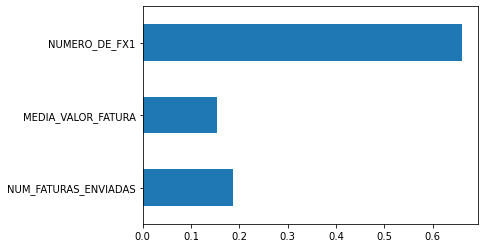

In [43]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=50,
    max_depth=5
)

clf.fit(
    SET13.drop(['DS_ROLAGEM'], axis=1),
    SET13['DS_ROLAGEM']
)

feat_importances = pd.Series(
    clf.feature_importances_, 
    index=SET13.drop(['DS_ROLAGEM'], axis=1).columns
)
feat_importances.plot(kind='barh');

# A variável calculada que tem o maior potencial de preditivo em relação a variável DS_ROLAGEM do mês de setembro é a de número de faturas não pagas nos 6 meses anteriores.

# Questão 2 

In [44]:
Q21 = pd.read_csv('Q21.txt', sep="\t")
Q22 = pd.read_csv('Q22.txt', sep="\t")
Q23 = pd.read_csv('Q23.txt', sep="\t")
Q24 = pd.read_csv('Q24.txt', sep="\t")
Q25 = pd.read_csv('Q25.txt', sep="\t")

In [45]:
Q21.columns

Index(['ID_CONTA', 'DT_ACORDO', 'NU_DIAS_ATRASO', 'VALOR_CRELIQ',
       'DIVIDA_ATUAL', 'RESPOSTA'],
      dtype='object')

In [46]:
Q22.columns

Index(['ID_CONTA', 'DT_ACORDO', 'QTD_PARCELAMENTO_3M', 'QTD_PARCELAMENTO_6M',
       'QTD_PARCELAMENTO_12M'],
      dtype='object')

In [47]:
Q23.columns

Index(['ID_CONTA', 'DT_ACORDO', 'LIMITE'], dtype='object')

In [48]:
Q24.columns

Index(['ID_CONTA', 'DT_ACORDO', 'QTD_EXTRATOS', 'QTD_FX0_GERAL',
       'QTD_FX1_GERAL', 'QTD_FX2_GERAL', 'QTD_FX0_3M', 'QTD_FX0_6M',
       'QTD_FX1_3M', 'QTD_FX1_6M', 'QTD_FX2_3M', 'QTD_FX2_6M'],
      dtype='object')

In [49]:
Q25.columns

Index(['ID_CONTA', 'DT_ACORDO', 'QTD_CPC_10D', 'QTD_CPC_1M', 'QTD_CPC_3M',
       'QTD_CPC_6M', 'QTD_CP_10D', 'QTD_CP_1M', 'QTD_CP_3M', 'QTD_CP_6M',
       'QTD_ACIONAMENTO_10D', 'QTD_ACIONAMENTO_1M', 'QTD_ACIONAMENTO_3M',
       'QTD_ACIONAMENTO_6M'],
      dtype='object')

In [50]:
Q22OK= Q22.columns.difference(Q21.columns)
Q22OK

Index(['QTD_PARCELAMENTO_12M', 'QTD_PARCELAMENTO_3M', 'QTD_PARCELAMENTO_6M'], dtype='object')

In [51]:
Q2= Q21.merge(Q22[Q22OK], left_index=True, right_index=True, how='outer')
Q2

,ID_CONTA,DT_ACORDO,NU_DIAS_ATRASO,VALOR_CRELIQ,DIVIDA_ATUAL,RESPOSTA,QTD_PARCELAMENTO_12M,QTD_PARCELAMENTO_3M,QTD_PARCELAMENTO_6M
0,1194908,2018-11-22,221,324.38,463.73,0,0,0,0
1,1447997,2018-11-22,191,334.82,451.56,1,0,0,0
2,1035415,2018-11-22,252,1682.26,2554.18,0,1,0,0
3,1069434,2018-11-22,231,1625.01,2368.65,0,0,0,0
4,1427566,2018-11-22,270,320.07,503.25,0,1,1,1
...,...,...,...,...,...,...,...,...,...
72528,1390822,2019-06-04,405,747.97,1540.55,0,0,0,0
72529,1392826,2019-06-04,242,765.79,1149.22,0,1,1,1
72530,1392953,2019-06-04,293,700.58,1160.85,0,1,1,1
72531,1393698,2019-06-04,191,729.51,991.53,0,1,1,1


In [52]:
Q23OK= Q23.columns.difference(Q2.columns)
Q23OK

Index(['LIMITE'], dtype='object')

In [53]:
Q2= Q2.merge(Q23[Q23OK], left_index=True, right_index=True, how='outer')
Q2

,ID_CONTA,DT_ACORDO,NU_DIAS_ATRASO,VALOR_CRELIQ,DIVIDA_ATUAL,RESPOSTA,QTD_PARCELAMENTO_12M,QTD_PARCELAMENTO_3M,QTD_PARCELAMENTO_6M,LIMITE
0,1194908,2018-11-22,221,324.38,463.73,0,0,0,0,1229.0
1,1447997,2018-11-22,191,334.82,451.56,1,0,0,0,831.0
2,1035415,2018-11-22,252,1682.26,2554.18,0,1,0,0,455.0
3,1069434,2018-11-22,231,1625.01,2368.65,0,0,0,0,3073.0
4,1427566,2018-11-22,270,320.07,503.25,0,1,1,1,1052.0
...,...,...,...,...,...,...,...,...,...,...
72528,1390822,2019-06-04,405,747.97,1540.55,0,0,0,0,1745.0
72529,1392826,2019-06-04,242,765.79,1149.22,0,1,1,1,1490.0
72530,1392953,2019-06-04,293,700.58,1160.85,0,1,1,1,3038.0
72531,1393698,2019-06-04,191,729.51,991.53,0,1,1,1,1564.0


In [54]:
Q24OK= Q24.columns.difference(Q2.columns)
Q24OK

Index(['QTD_EXTRATOS', 'QTD_FX0_3M', 'QTD_FX0_6M', 'QTD_FX0_GERAL',
       'QTD_FX1_3M', 'QTD_FX1_6M', 'QTD_FX1_GERAL', 'QTD_FX2_3M', 'QTD_FX2_6M',
       'QTD_FX2_GERAL'],
      dtype='object')

In [55]:
Q2= Q2.merge(Q24[Q24OK], left_index=True, right_index=True, how='outer')
Q2

,ID_CONTA,DT_ACORDO,NU_DIAS_ATRASO,VALOR_CRELIQ,DIVIDA_ATUAL,RESPOSTA,QTD_PARCELAMENTO_12M,QTD_PARCELAMENTO_3M,QTD_PARCELAMENTO_6M,LIMITE,QTD_EXTRATOS,QTD_FX0_3M,QTD_FX0_6M,QTD_FX0_GERAL,QTD_FX1_3M,QTD_FX1_6M,QTD_FX1_GERAL,QTD_FX2_3M,QTD_FX2_6M,QTD_FX2_GERAL
0,1194908,2018-11-22,221,324.38,463.73,0,0,0,0,1229.0,5,4,6,5,0,0,0,0,0,0
1,1447997,2018-11-22,191,334.82,451.56,1,0,0,0,831.0,3,3,3,2,1,1,1,0,0,0
2,1035415,2018-11-22,252,1682.26,2554.18,0,1,0,0,455.0,26,4,5,23,0,1,2,0,1,1
3,1069434,2018-11-22,231,1625.01,2368.65,0,0,0,0,3073.0,17,4,7,16,0,0,1,0,0,0
4,1427566,2018-11-22,270,320.07,503.25,0,1,1,1,1052.0,2,3,3,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72528,1390822,2019-06-04,405,747.97,1540.55,0,0,0,0,1745.0,3,3,3,2,1,1,1,0,0,0
72529,1392826,2019-06-04,242,765.79,1149.22,0,1,1,1,1490.0,2,3,3,2,0,0,0,0,0,0
72530,1392953,2019-06-04,293,700.58,1160.85,0,1,1,1,3038.0,4,3,5,4,0,0,0,0,0,0
72531,1393698,2019-06-04,191,729.51,991.53,0,1,1,1,1564.0,4,3,4,3,1,1,1,0,0,0


In [56]:
Q25OK= Q25.columns.difference(Q2.columns)
Q25OK

Index(['QTD_ACIONAMENTO_10D', 'QTD_ACIONAMENTO_1M', 'QTD_ACIONAMENTO_3M',
       'QTD_ACIONAMENTO_6M', 'QTD_CPC_10D', 'QTD_CPC_1M', 'QTD_CPC_3M',
       'QTD_CPC_6M', 'QTD_CP_10D', 'QTD_CP_1M', 'QTD_CP_3M', 'QTD_CP_6M'],
      dtype='object')

In [57]:
Q2= Q2.merge(Q25[Q25OK], left_index=True, right_index=True, how='outer')
Q2

,ID_CONTA,DT_ACORDO,NU_DIAS_ATRASO,VALOR_CRELIQ,DIVIDA_ATUAL,RESPOSTA,QTD_PARCELAMENTO_12M,QTD_PARCELAMENTO_3M,QTD_PARCELAMENTO_6M,LIMITE,...,QTD_ACIONAMENTO_3M,QTD_ACIONAMENTO_6M,QTD_CPC_10D,QTD_CPC_1M,QTD_CPC_3M,QTD_CPC_6M,QTD_CP_10D,QTD_CP_1M,QTD_CP_3M,QTD_CP_6M
0,1194908,2018-11-22,221,324.38,463.73,0,0,0,0,1229.0,...,6.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1447997,2018-11-22,191,334.82,451.56,1,0,0,0,831.0,...,21.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,1035415,2018-11-22,252,1682.26,2554.18,0,1,0,0,455.0,...,23.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1069434,2018-11-22,231,1625.01,2368.65,0,0,0,0,3073.0,...,22.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,1427566,2018-11-22,270,320.07,503.25,0,1,1,1,1052.0,...,35.0,121.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72528,1390822,2019-06-04,405,747.97,1540.55,0,0,0,0,1745.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72529,1392826,2019-06-04,242,765.79,1149.22,0,1,1,1,1490.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72530,1392953,2019-06-04,293,700.58,1160.85,0,1,1,1,3038.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72531,1393698,2019-06-04,191,729.51,991.53,0,1,1,1,1564.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
Q2.columns

Index(['ID_CONTA', 'DT_ACORDO', 'NU_DIAS_ATRASO', 'VALOR_CRELIQ',
       'DIVIDA_ATUAL', 'RESPOSTA', 'QTD_PARCELAMENTO_12M',
       'QTD_PARCELAMENTO_3M', 'QTD_PARCELAMENTO_6M', 'LIMITE', 'QTD_EXTRATOS',
       'QTD_FX0_3M', 'QTD_FX0_6M', 'QTD_FX0_GERAL', 'QTD_FX1_3M', 'QTD_FX1_6M',
       'QTD_FX1_GERAL', 'QTD_FX2_3M', 'QTD_FX2_6M', 'QTD_FX2_GERAL',
       'QTD_ACIONAMENTO_10D', 'QTD_ACIONAMENTO_1M', 'QTD_ACIONAMENTO_3M',
       'QTD_ACIONAMENTO_6M', 'QTD_CPC_10D', 'QTD_CPC_1M', 'QTD_CPC_3M',
       'QTD_CPC_6M', 'QTD_CP_10D', 'QTD_CP_1M', 'QTD_CP_3M', 'QTD_CP_6M'],
      dtype='object')

In [59]:
Q2.head()

,ID_CONTA,DT_ACORDO,NU_DIAS_ATRASO,VALOR_CRELIQ,DIVIDA_ATUAL,RESPOSTA,QTD_PARCELAMENTO_12M,QTD_PARCELAMENTO_3M,QTD_PARCELAMENTO_6M,LIMITE,...,QTD_ACIONAMENTO_3M,QTD_ACIONAMENTO_6M,QTD_CPC_10D,QTD_CPC_1M,QTD_CPC_3M,QTD_CPC_6M,QTD_CP_10D,QTD_CP_1M,QTD_CP_3M,QTD_CP_6M
0,1194908,2018-11-22,221,324.38,463.73,0,0,0,0,1229.0,...,6.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1447997,2018-11-22,191,334.82,451.56,1,0,0,0,831.0,...,21.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,1035415,2018-11-22,252,1682.26,2554.18,0,1,0,0,455.0,...,23.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1069434,2018-11-22,231,1625.01,2368.65,0,0,0,0,3073.0,...,22.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,1427566,2018-11-22,270,320.07,503.25,0,1,1,1,1052.0,...,35.0,121.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


# 2.1 – Qual o percentual de adesão mensal por faixa de atraso (Histórico)?  

In [60]:
Q21['DT_ACORDO'] = pd.to_datetime(Q21['DT_ACORDO'])

In [61]:
Q21['MES'] = Q21.DT_ACORDO.dt.month
Q21

,ID_CONTA,DT_ACORDO,NU_DIAS_ATRASO,VALOR_CRELIQ,DIVIDA_ATUAL,RESPOSTA,MES
0,1194908,2018-11-22,221,324.38,463.73,0,11
1,1447997,2018-11-22,191,334.82,451.56,1,11
2,1035415,2018-11-22,252,1682.26,2554.18,0,11
3,1069434,2018-11-22,231,1625.01,2368.65,0,11
4,1427566,2018-11-22,270,320.07,503.25,0,11
...,...,...,...,...,...,...,...
72528,1390822,2019-06-04,405,747.97,1540.55,0,6
72529,1392826,2019-06-04,242,765.79,1149.22,0,6
72530,1392953,2019-06-04,293,700.58,1160.85,0,6
72531,1393698,2019-06-04,191,729.51,991.53,0,6


In [62]:
ADESAO = Q21[Q21["RESPOSTA"].isin([1])]
ADESAO

,ID_CONTA,DT_ACORDO,NU_DIAS_ATRASO,VALOR_CRELIQ,DIVIDA_ATUAL,RESPOSTA,MES
1,1447997,2018-11-22,191,334.82,451.56,1,11
36,426386,2018-11-22,231,333.98,486.81,1,11
45,1304033,2018-11-22,270,1009.27,1586.90,1,11
57,1155418,2018-11-22,257,412.72,632.75,1,11
64,1271430,2018-11-22,221,325.42,465.21,1,11
...,...,...,...,...,...,...,...
72424,1301193,2019-06-04,237,1159.07,1722.62,1,6
72456,1456523,2019-06-04,264,1708.02,2675.16,1,6
72490,1473217,2019-06-04,257,1526.15,2358.01,1,6
72491,1473387,2019-06-04,234,1284.46,1897.89,1,6


In [63]:
ADESAO112018 = ADESAO[ADESAO["MES"].isin([11])]
ADESAO112018

,ID_CONTA,DT_ACORDO,NU_DIAS_ATRASO,VALOR_CRELIQ,DIVIDA_ATUAL,RESPOSTA,MES
1,1447997,2018-11-22,191,334.82,451.56,1,11
36,426386,2018-11-22,231,333.98,486.81,1,11
45,1304033,2018-11-22,270,1009.27,1586.90,1,11
57,1155418,2018-11-22,257,412.72,632.75,1,11
64,1271430,2018-11-22,221,325.42,465.21,1,11
...,...,...,...,...,...,...,...
17923,767575,2018-11-22,285,1576.48,2552.02,1,11
17934,1241457,2018-11-22,181,646.94,855.73,1,11
17954,1231497,2018-11-22,266,1114.04,1738.08,1,11
17980,1229340,2018-11-22,337,1221.97,2188.36,1,11


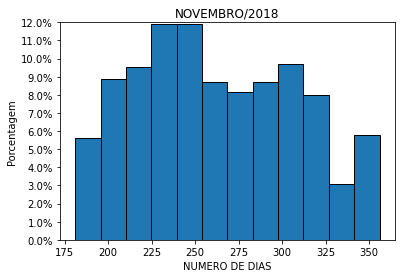

In [64]:
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
y_vals, x_vals, e_ = ax.hist(ADESAO112018['NU_DIAS_ATRASO'], bins=12, edgecolor='black')
ax.set_title("NOVEMBRO/2018")
ax.set_xlabel("NUMERO DE DIAS")
ax.set_ylabel("Porcentagem")
y_max = round((max(y_vals) / len(ADESAO112018['NU_DIAS_ATRASO'])) + 0.01, 2)
ax.set_yticks(ticks=np.arange(0.0, y_max * len(ADESAO112018['NU_DIAS_ATRASO']), 0.01 * len(ADESAO112018['NU_DIAS_ATRASO'])))
ax.set_ylim(ax.get_yticks()[0], ax.get_yticks()[-1])
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(ADESAO112018['NU_DIAS_ATRASO'])))
plt.show()

In [65]:
ADESAO032019 = ADESAO[ADESAO["MES"].isin([3])]

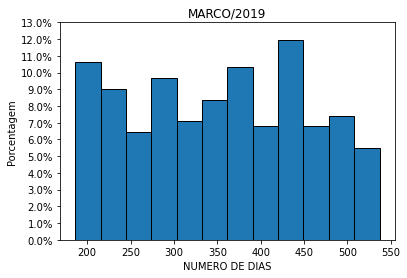

In [66]:
fig, ax = plt.subplots()
y_vals, x_vals, e_ = ax.hist(ADESAO032019['NU_DIAS_ATRASO'], bins=12, edgecolor='black')
ax.set_title("MARCO/2019")
ax.set_xlabel("NUMERO DE DIAS")
ax.set_ylabel("Porcentagem")
y_max = round((max(y_vals) / len(ADESAO032019['NU_DIAS_ATRASO'])) + 0.01, 2)
ax.set_yticks(ticks=np.arange(0.0, y_max * len(ADESAO032019['NU_DIAS_ATRASO']), 0.01 * len(ADESAO032019['NU_DIAS_ATRASO'])))
ax.set_ylim(ax.get_yticks()[0], ax.get_yticks()[-1])
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(ADESAO032019['NU_DIAS_ATRASO'])))
plt.show()

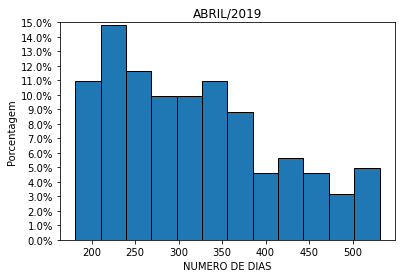

In [67]:
ADESAO042019 = ADESAO[ADESAO["MES"].isin([4])]
fig, ax = plt.subplots()
y_vals, x_vals, e_ = ax.hist(ADESAO042019['NU_DIAS_ATRASO'], bins=12, edgecolor='black')
ax.set_title("ABRIL/2019")
ax.set_xlabel("NUMERO DE DIAS")
ax.set_ylabel("Porcentagem")
y_max = round((max(y_vals) / len(ADESAO042019['NU_DIAS_ATRASO'])) + 0.01, 2)
ax.set_yticks(ticks=np.arange(0.0, y_max * len(ADESAO042019['NU_DIAS_ATRASO']), 0.01 * len(ADESAO042019['NU_DIAS_ATRASO'])))
ax.set_ylim(ax.get_yticks()[0], ax.get_yticks()[-1])
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(ADESAO042019['NU_DIAS_ATRASO'])))
plt.show()

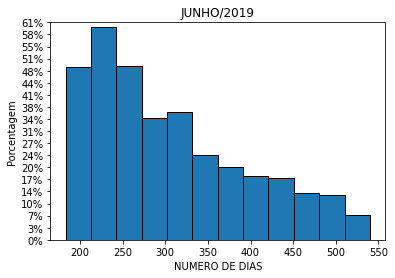

In [68]:
ADESAO062019 = ADESAO[ADESAO["MES"].isin([6])]
fig, ax = plt.subplots()
y_vals, x_vals, e_ = ax.hist(ADESAO062019['NU_DIAS_ATRASO'], bins=12, edgecolor='black')
ax.set_title("JUNHO/2019")
ax.set_xlabel("NUMERO DE DIAS")
ax.set_ylabel("Porcentagem")
y_max = round((max(y_vals) / len(ADESAO062019['NU_DIAS_ATRASO'])) + 0.01, 2)
ax.set_yticks(ticks=np.arange(0.0, y_max * len(ADESAO062019['NU_DIAS_ATRASO']), 0.01 * len(ADESAO062019['NU_DIAS_ATRASO'])))
ax.set_ylim(ax.get_yticks()[0], ax.get_yticks()[-1])
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(ADESAO042019['NU_DIAS_ATRASO'])))
plt.show()

In [69]:
ADESAO['ID_CONTA'].groupby([ADESAO.DT_ACORDO.dt.year,  ADESAO.DT_ACORDO.dt.month]).agg('count')

DT_ACORDO  DT_ACORDO
2018       11           587
2019       3            310
           4            283
           6            965
Name: ID_CONTA, dtype: int64

In [70]:
#PORCENTAGEM DE FECHAMENTOS EM 11/2018

(587/2145) * 100

27.365967365967364

In [71]:
#PORCENTAGEM DE FECHAMENTOS EM 03/2019

(310/2145) * 100

14.452214452214452

In [72]:
#PORCENTAGEM DE FECHAMENTOS EM 04/2019


(283/2145) * 100

13.193473193473192

In [73]:
#PORCENTAGEM DE FECHAMENTOS EM 06/2019


(965/2145) * 100

44.988344988344984

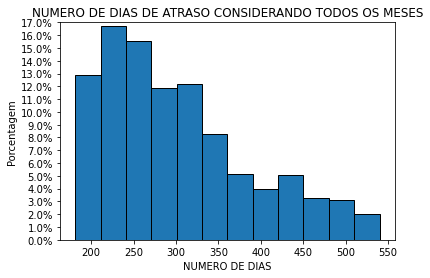

In [74]:
fig, ax = plt.subplots()
y_vals, x_vals, e_ = ax.hist(ADESAO['NU_DIAS_ATRASO'], bins=12, edgecolor='black')
ax.set_title("NUMERO DE DIAS DE ATRASO CONSIDERANDO TODOS OS MESES")
ax.set_xlabel("NUMERO DE DIAS")
ax.set_ylabel("Porcentagem")
y_max = round((max(y_vals) / len(ADESAO['NU_DIAS_ATRASO'])) + 0.01, 2)
ax.set_yticks(ticks=np.arange(0.0, y_max * len(ADESAO['NU_DIAS_ATRASO']), 0.01 * len(ADESAO['NU_DIAS_ATRASO'])))
ax.set_ylim(ax.get_yticks()[0], ax.get_yticks()[-1])
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(ADESAO['NU_DIAS_ATRASO'])))
plt.show()

# 2.2 – Qual modelo você utilizaria para traçar uma estratégia objetivando o aumento da adesão dos acordos? (Descreva a técnica utilizada) 

In [75]:
Q2['DT_ACORDO'] = pd.to_datetime(Q2['DT_ACORDO'])

In [76]:
Q21SEMDATA = Q21[['NU_DIAS_ATRASO', 'VALOR_CRELIQ','DIVIDA_ATUAL','RESPOSTA']]
Q21SEMDATA

,NU_DIAS_ATRASO,VALOR_CRELIQ,DIVIDA_ATUAL,RESPOSTA
0,221,324.38,463.73,0
1,191,334.82,451.56,1
2,252,1682.26,2554.18,0
3,231,1625.01,2368.65,0
4,270,320.07,503.25,0
...,...,...,...,...
72528,405,747.97,1540.55,0
72529,242,765.79,1149.22,0
72530,293,700.58,1160.85,0
72531,191,729.51,991.53,0


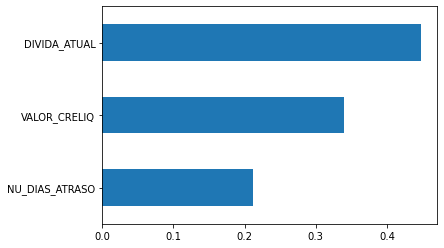

In [77]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=50,
    max_depth=5
)

clf.fit(
    Q21SEMDATA.drop(['RESPOSTA'], axis=1),
    Q21SEMDATA['RESPOSTA']
)

feat_importances = pd.Series(
    clf.feature_importances_, 
    index=Q21SEMDATA.drop(['RESPOSTA'], axis=1).columns
)
feat_importances.plot(kind='barh');

NUMERO DE DIAS DE ATRASO TEM RELEVANCIA MENOR PARA FECHAMENTO DO QUE VALOR DA DIVIDA E DO CRELIQ

In [78]:
Q22SEMDATA = Q22[['QTD_PARCELAMENTO_3M','QTD_PARCELAMENTO_6M','QTD_PARCELAMENTO_12M']]
Q22SEMDATA

,QTD_PARCELAMENTO_3M,QTD_PARCELAMENTO_6M,QTD_PARCELAMENTO_12M
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,0
4,1,1,1
...,...,...,...
72528,0,0,0
72529,1,1,1
72530,1,1,1
72531,1,1,1


In [79]:
Q22SEMDATA.sum(axis = 0, skipna = True)

QTD_PARCELAMENTO_3M     24921
QTD_PARCELAMENTO_6M     35274
QTD_PARCELAMENTO_12M    44447
dtype: int64

QUANTO MAIOR O NUMERO DE PARCELAS, MAIOR A CHANCE DE FECHAMENTO

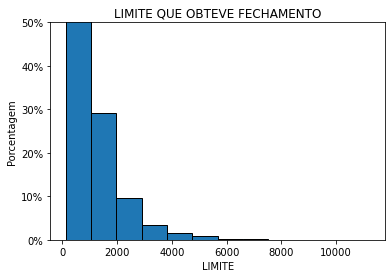

In [80]:
fig, ax = plt.subplots()
y_vals, x_vals, e_ = ax.hist(Q23['LIMITE'], bins=12, edgecolor='black')
ax.set_title("LIMITE QUE OBTEVE FECHAMENTO")
ax.set_xlabel("LIMITE")
ax.set_ylabel("Porcentagem")
y_max = round((max(y_vals) / len(Q23['LIMITE'])) + 0.01, 2)
ax.set_yticks(ticks=np.arange(0.0, y_max * len(Q23['LIMITE']), 0.1 * len(Q23['LIMITE'])))
ax.set_ylim(ax.get_yticks()[0], ax.get_yticks()[-1])
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(Q23['LIMITE'])))
plt.show()

QUANTO MENOR O LIMITE, MAIOR A PROBABILIDADE DE FECHAMENTO

In [81]:
Q2.columns

Index(['ID_CONTA', 'DT_ACORDO', 'NU_DIAS_ATRASO', 'VALOR_CRELIQ',
       'DIVIDA_ATUAL', 'RESPOSTA', 'QTD_PARCELAMENTO_12M',
       'QTD_PARCELAMENTO_3M', 'QTD_PARCELAMENTO_6M', 'LIMITE', 'QTD_EXTRATOS',
       'QTD_FX0_3M', 'QTD_FX0_6M', 'QTD_FX0_GERAL', 'QTD_FX1_3M', 'QTD_FX1_6M',
       'QTD_FX1_GERAL', 'QTD_FX2_3M', 'QTD_FX2_6M', 'QTD_FX2_GERAL',
       'QTD_ACIONAMENTO_10D', 'QTD_ACIONAMENTO_1M', 'QTD_ACIONAMENTO_3M',
       'QTD_ACIONAMENTO_6M', 'QTD_CPC_10D', 'QTD_CPC_1M', 'QTD_CPC_3M',
       'QTD_CPC_6M', 'QTD_CP_10D', 'QTD_CP_1M', 'QTD_CP_3M', 'QTD_CP_6M'],
      dtype='object')

# 2.2 – Qual modelo você utilizaria para traçar uma estratégia objetivando o aumento da adesão dos acordos? (Descreva a técnica utilizada) 

O modelo seria o Decision Tree Classifier, do Scikit-Learn. Esse modelo usa de opções para uma classificação em um modelo de arvore, que funciona bem para os dados que temos, pois os dados são simples e de facil interpretação, as classes em sua maioria não precisam de normalização e o modelo leva a um resultado facilmente interpretavel.

# 2.3 – Quais indicadores e ferramentas você utilizaria para avaliar a performance/aderência desse modelo? (Descreva os indicadores utilizados) 

Segundo a analise exploratoria que apresentei acima, os indicadores de:
- Quanto maior o valor da divida e do CRELIC
- Quanto maior o numero de parcelas disponibilizadas
- Quão mais baixo for o valor do limite disponibilizado 
influenciam com mais relevancia no resultado de fechamento positivo.

# 2.4 – Apresente o modelo desenvolvido utilizando a técnica do item (2.2) e as técnicas de avaliação descritas no item (2.3). 

In [82]:
Q2DTC = Q2.drop(['ID_CONTA', 'DT_ACORDO','QTD_ACIONAMENTO_10D', 'QTD_ACIONAMENTO_1M', 'QTD_ACIONAMENTO_3M',
       'QTD_ACIONAMENTO_6M', 'QTD_CPC_10D', 'QTD_CPC_1M', 'QTD_CPC_3M',
       'QTD_CPC_6M', 'QTD_CP_10D', 'QTD_CP_1M', 'QTD_CP_3M', 'QTD_CP_6M'], axis=1)
Q2DTC

,NU_DIAS_ATRASO,VALOR_CRELIQ,DIVIDA_ATUAL,RESPOSTA,QTD_PARCELAMENTO_12M,QTD_PARCELAMENTO_3M,QTD_PARCELAMENTO_6M,LIMITE,QTD_EXTRATOS,QTD_FX0_3M,QTD_FX0_6M,QTD_FX0_GERAL,QTD_FX1_3M,QTD_FX1_6M,QTD_FX1_GERAL,QTD_FX2_3M,QTD_FX2_6M,QTD_FX2_GERAL
0,221,324.38,463.73,0,0,0,0,1229.0,5,4,6,5,0,0,0,0,0,0
1,191,334.82,451.56,1,0,0,0,831.0,3,3,3,2,1,1,1,0,0,0
2,252,1682.26,2554.18,0,1,0,0,455.0,26,4,5,23,0,1,2,0,1,1
3,231,1625.01,2368.65,0,0,0,0,3073.0,17,4,7,16,0,0,1,0,0,0
4,270,320.07,503.25,0,1,1,1,1052.0,2,3,3,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72528,405,747.97,1540.55,0,0,0,0,1745.0,3,3,3,2,1,1,1,0,0,0
72529,242,765.79,1149.22,0,1,1,1,1490.0,2,3,3,2,0,0,0,0,0,0
72530,293,700.58,1160.85,0,1,1,1,3038.0,4,3,5,4,0,0,0,0,0,0
72531,191,729.51,991.53,0,1,1,1,1564.0,4,3,4,3,1,1,1,0,0,0


In [83]:
Q2DTC.isna().sum()

NU_DIAS_ATRASO          0
VALOR_CRELIQ            0
DIVIDA_ATUAL            0
RESPOSTA                0
QTD_PARCELAMENTO_12M    0
QTD_PARCELAMENTO_3M     0
QTD_PARCELAMENTO_6M     0
LIMITE                  0
QTD_EXTRATOS            0
QTD_FX0_3M              0
QTD_FX0_6M              0
QTD_FX0_GERAL           0
QTD_FX1_3M              0
QTD_FX1_6M              0
QTD_FX1_GERAL           0
QTD_FX2_3M              0
QTD_FX2_6M              0
QTD_FX2_GERAL           0
dtype: int64

In [84]:
X = Q2DTC.drop(['RESPOSTA'], axis=1)
y = Q2DTC['RESPOSTA']

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.33, 
    random_state=1
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(48597, 17) (48597,)
(23936, 17) (23936,)


In [88]:
model = DecisionTreeClassifier(
    max_depth=4,
    criterion='entropy',
    random_state=1
)

model.fit(
    X_train, y_train
)

y_pred = model.predict(X_test)

In [89]:
# Avalia com a métrica de acurácia
metrics.accuracy_score(
    y_test, # Valor esperado
    y_pred # Valor previsto
)

0.9700451203208557

A acurácia do modelo é de 97%


# Questão 3 

O time de engenharia de dados da Fortbrasil criou uma base de dados onde os analistas conseguiram avaliar as informações de vendas no cartão de crédito utilizando algumas aberturas: 

Baseado nesse modelo relacional, disponibilize 4 querys .sql para que seja possível obter as seguintes informações: 

3.1 - Todas as compras realizadas no mês de janeiro de 2020 em lojas do estado do Ceará (CE) 

 - ID da pessoa

SELECT ID_PESSOA FROM f_Vendas WHERE NU_MES = 1 AND NU_ANO = 2020 AND DS_UF = 'CE';

 - Nome da pessoa

SELECT NM_PESSOA FROM f_Vendas WHERE NU_MES = 1 AND NU_ANO = 2020 AND DS_UF = 'CE';

 - Data Referência da Venda

SELECT ID_PESSOA FROM f_Vendas WHERE NU_MES = 1 AND NU_ANO = 2020 AND DS_UF = 'CE';

 - Valor da Venda

SELECT VL_VENDA FROM f_Vendas WHERE NU_MES = 1 AND NU_ANO = 2020 AND DS_UF = 'CE';

3.2 - Quantidade de compras por cliente no mês de março de 2020 

ID da pessoa 
Quantidade de compras 


SELECT ID_PESSOA, COUNT(*) FROM f_Vendas WHERE NU_MES < 3 AND NU_ANO = 2020 GROUP BY ID_PESSOA;

3.3 – Todos os clientes que não fizeram compras no mês de março de 2020 

SELECT NM_PESSOA FROM f_Vendas WHERE NU_MES <> 3 AND NU_ANO = 2020 ;

3.4 – Data da última compra por cliente 

SELECT NM_PESSOA, MAX(DT_REF) FROM f_Vendas GROUP BY NM_PESSOA;  